In [1]:
import numpy as np
import pandas as pd

# import libraries for plotting
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# hiding warnings
import warnings
warnings.filterwarnings('ignore')

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder



In [2]:
data = './city_hours.csv'

df = pd.read_csv(data)

In [3]:
df.columns.values[2] = "PM25"

In [4]:
df.head()

,City,Datetime,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [5]:
null_counts = round(df.isnull().sum()/len(df) * 100,2)
print('Percentages of Null values in Features :')
print(null_counts[null_counts > 0].sort_values(ascending=False))

Percentages of Null values in Features :
Xylene        64.39
PM10          41.92
NH3           38.50
Toluene       31.16
Benzene       23.12
PM25          20.50
SO2           18.42
O3            18.25
AQI           18.23
AQI_Bucket    18.23
NOx           17.41
NO2           16.55
NO            16.48
CO            12.22
dtype: float64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM25        562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [7]:
num_cols = []
for col in df:
    if df[col].dtype == 'float64':
        num_cols.append(col)
print('Continues Variables:',num_cols)

Continues Variables: ['PM25', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']


In [8]:
df.describe()

,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000,578795.000000
mean,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537,166.413500
std,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832,162.112729
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000,79.000000
50%,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000,116.000000
75%,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000,208.000000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000


In [9]:
import random

color_=['#000057','#005757','#005700','#ad7100','#008080','#575757','#003153']
cmap_=['magma','copper','crest']

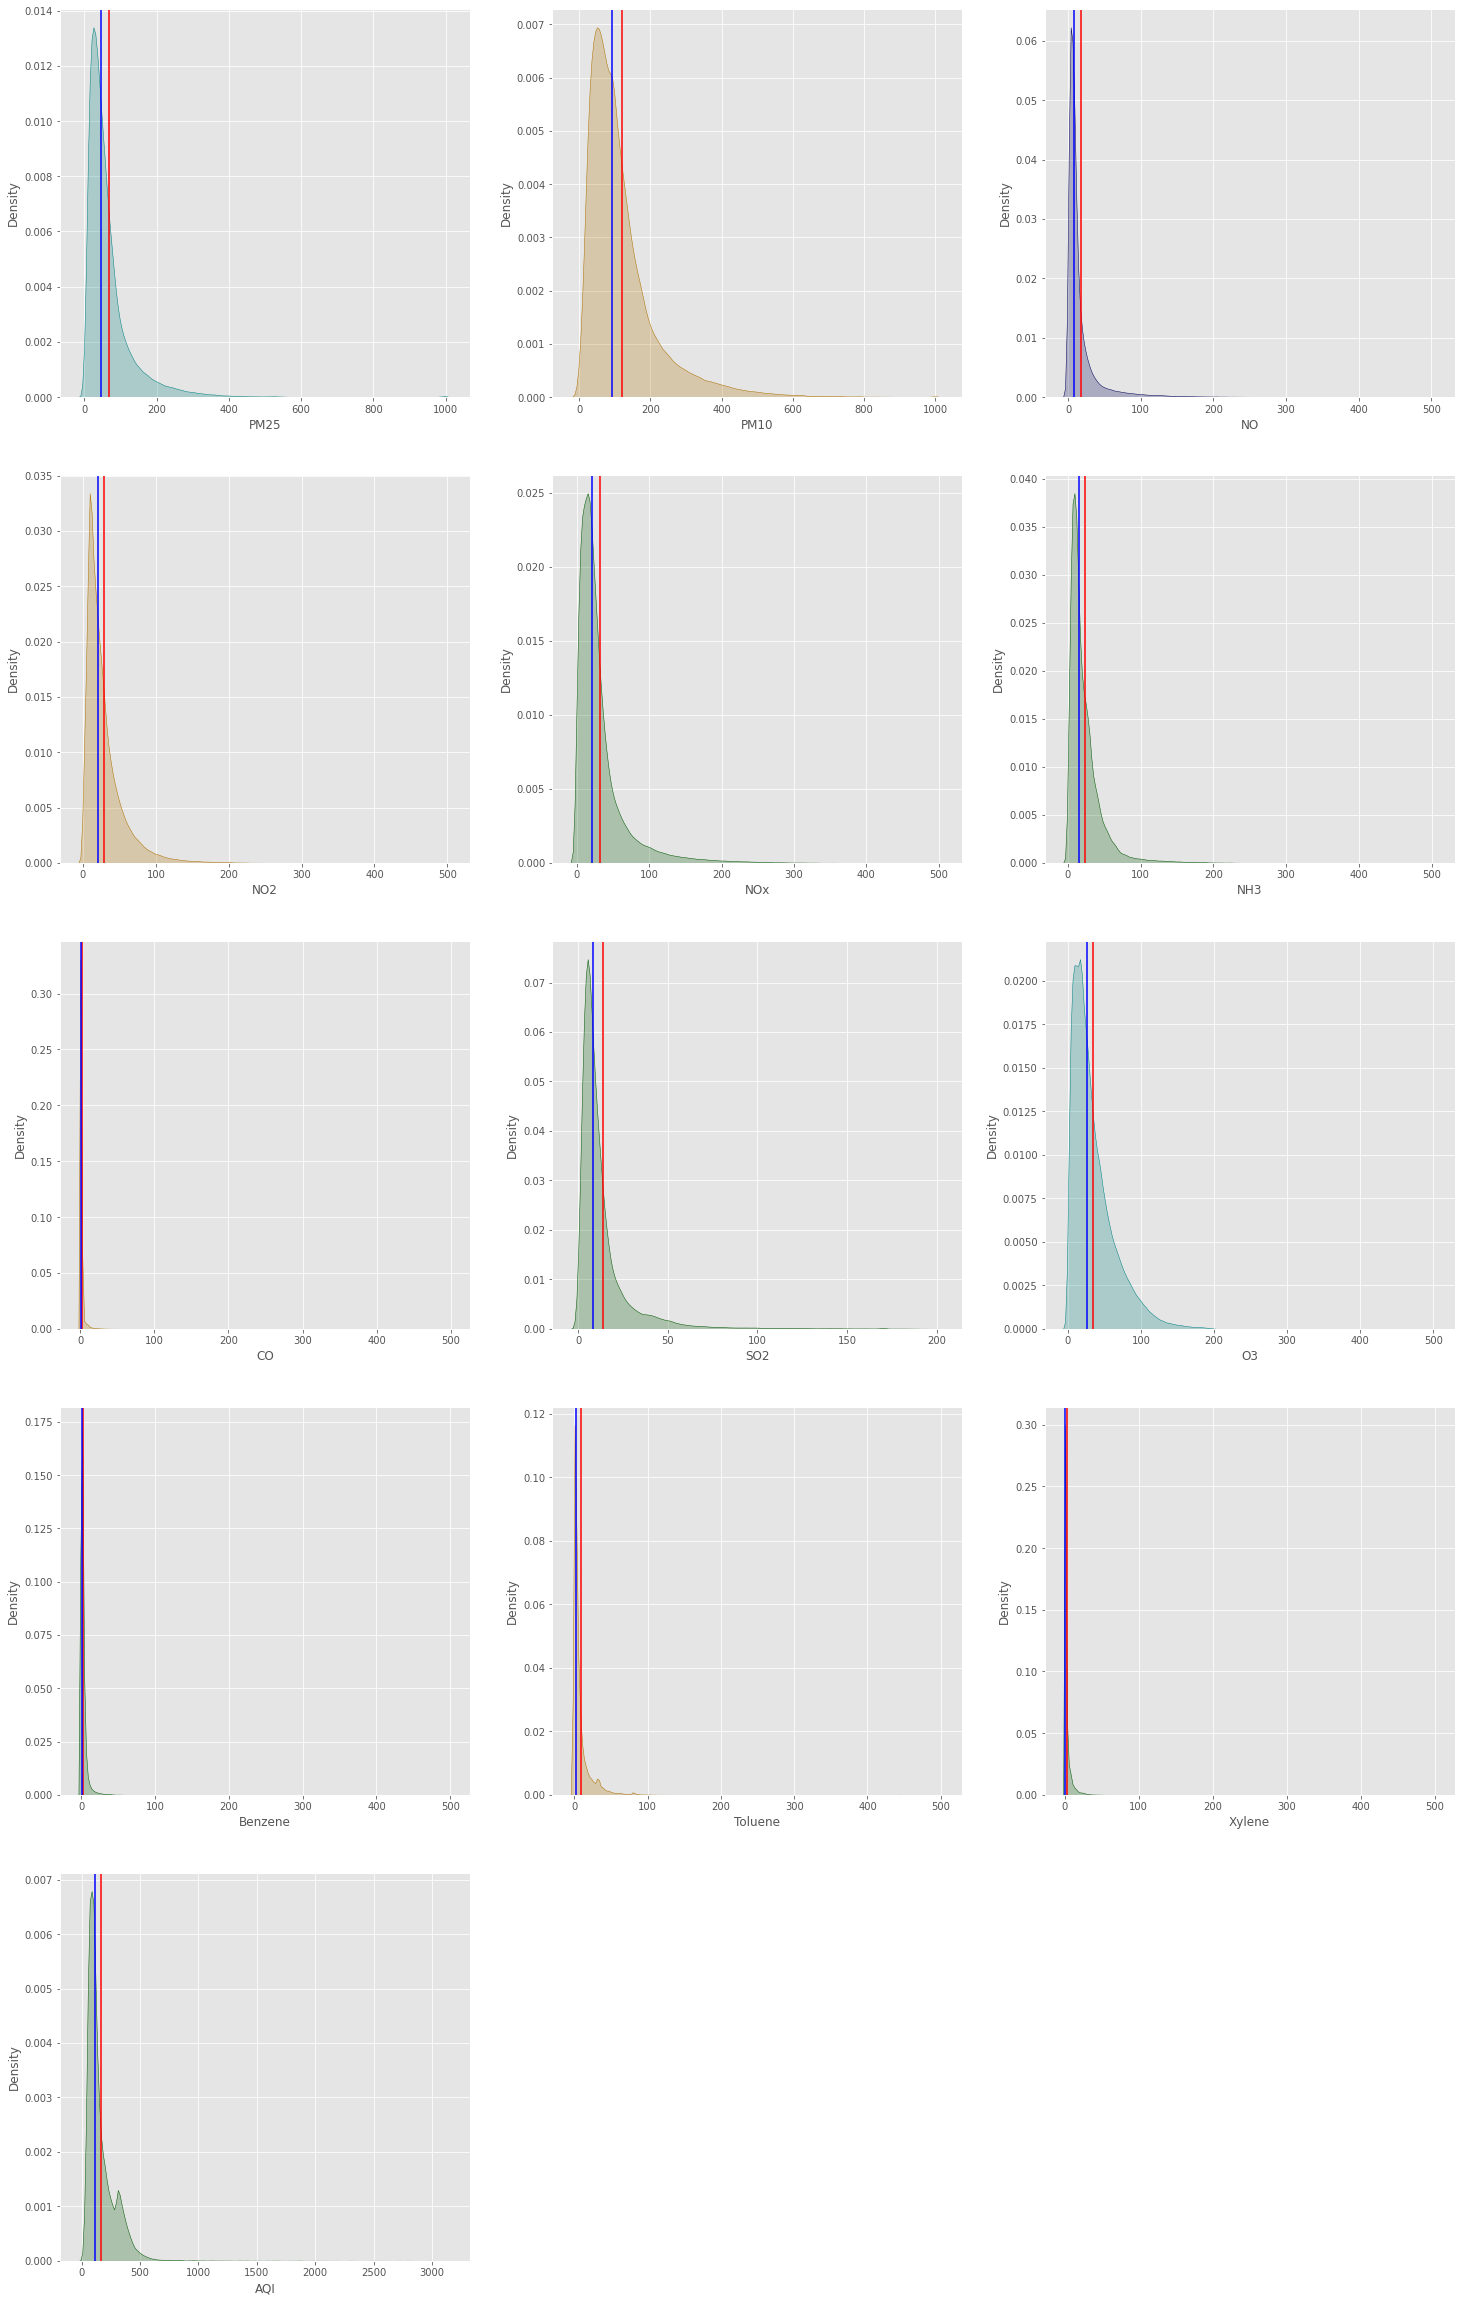

In [10]:
plt.figure(figsize=(25,50))
for i,col in enumerate(df[num_cols].columns):
    rand_col=color_[random.sample(range(6),1)[0]]
    plt.subplot(6,3,i+1)
    sns.kdeplot(data=df,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])
    plt.axvline(x=df[col].mean(),
            color='red')
    plt.axvline(x=df[col].median(),
            color='blue')

In [12]:
for col in num_cols:
    df[col] = df[col].replace(np.nan, df[col].median())
    
df = df.dropna()

In [13]:
null_counts = round(df.isnull().sum()/len(df) * 100,2)
print('Percentages of Null values in Features :')
print(null_counts[null_counts > 0].sort_values(ascending=False))

Percentages of Null values in Features :
Series([], dtype: float64)


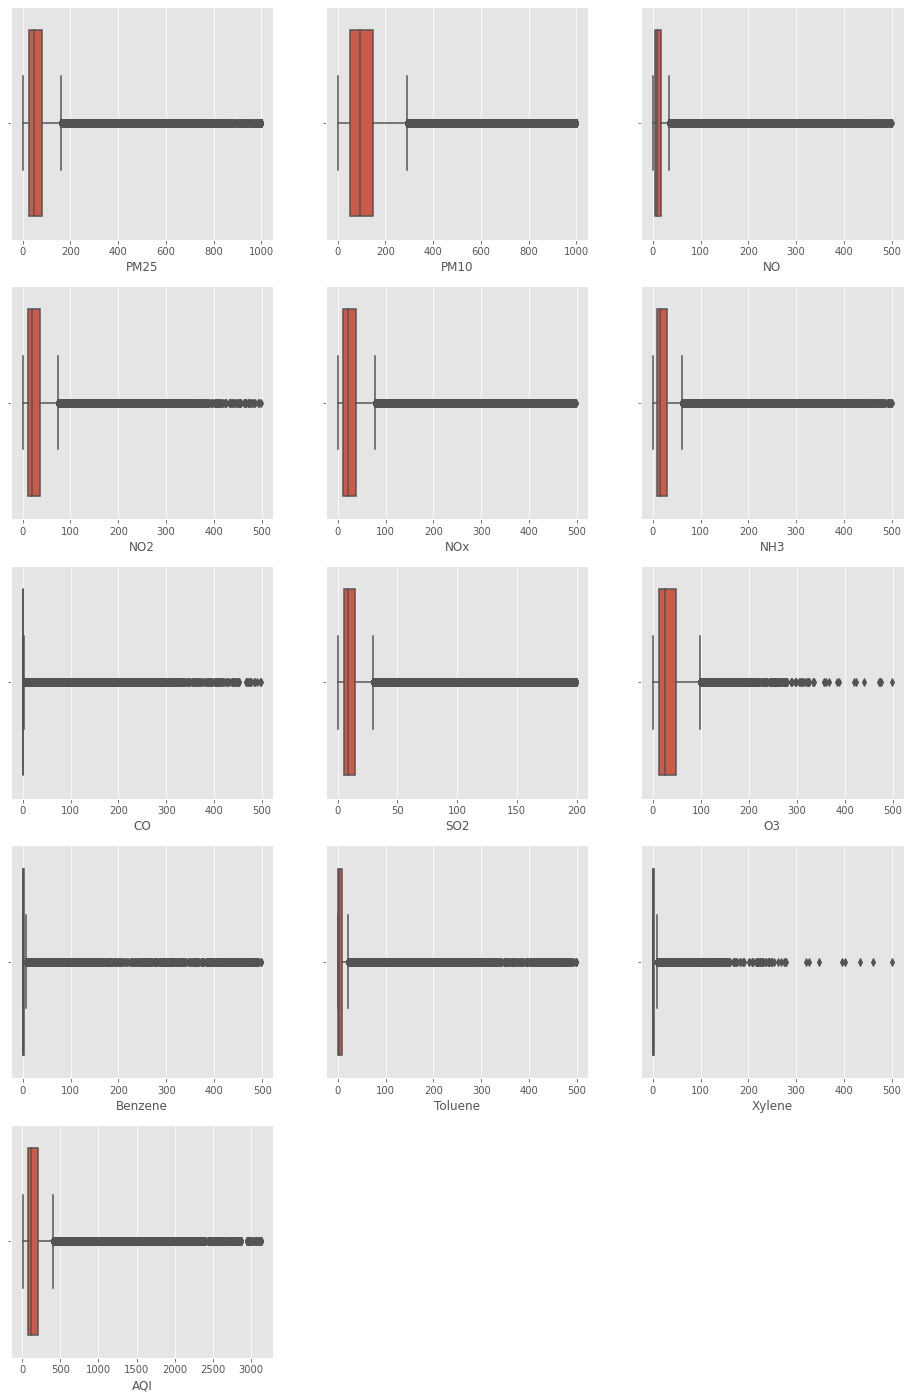

In [11]:
plt.figure(figsize=(16,30))
for i,col in enumerate(df[num_cols].columns):
    plt.subplot(6,3,i+1)    
    sns.boxplot(data=df,x=col)

Median : 7.96


<AxesSubplot:xlabel='NO', ylabel='Density'>

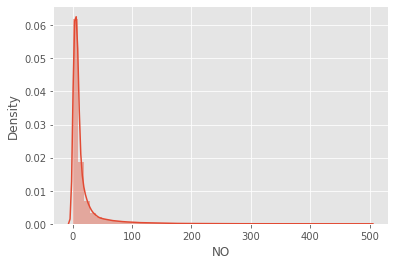

In [14]:
print('Median :',df['NO'].median())
sns.distplot(df['NO'])

Median : 8.37


<AxesSubplot:xlabel='SO2', ylabel='Density'>

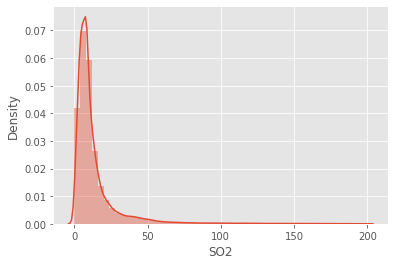

In [15]:
print('Median :',df['SO2'].median())
sns.distplot(df['SO2'])

In [16]:
Labeler = LabelEncoder()
df['AQI_Bucket'] = Labeler.fit_transform(df['AQI_Bucket'])

In [17]:
df.count()

City          578795
Datetime      578795
PM25          578795
PM10          578795
NO            578795
NO2           578795
NOx           578795
NH3           578795
CO            578795
SO2           578795
O3            578795
Benzene       578795
Toluene       578795
Xylene        578795
AQI           578795
AQI_Bucket    578795
dtype: int64

In [18]:
df[num_cols].skew()

PM25        4.355363
PM10        3.179897
NO          5.430875
NO2         3.355835
NOx         3.858744
NH3         6.296573
CO         21.054301
SO2         4.596542
O3          1.768726
Benzene    23.994224
Toluene    12.720470
Xylene     20.499762
AQI         6.381367
dtype: float64

In [19]:
df.columns

Index(['City', 'Datetime', 'PM25', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

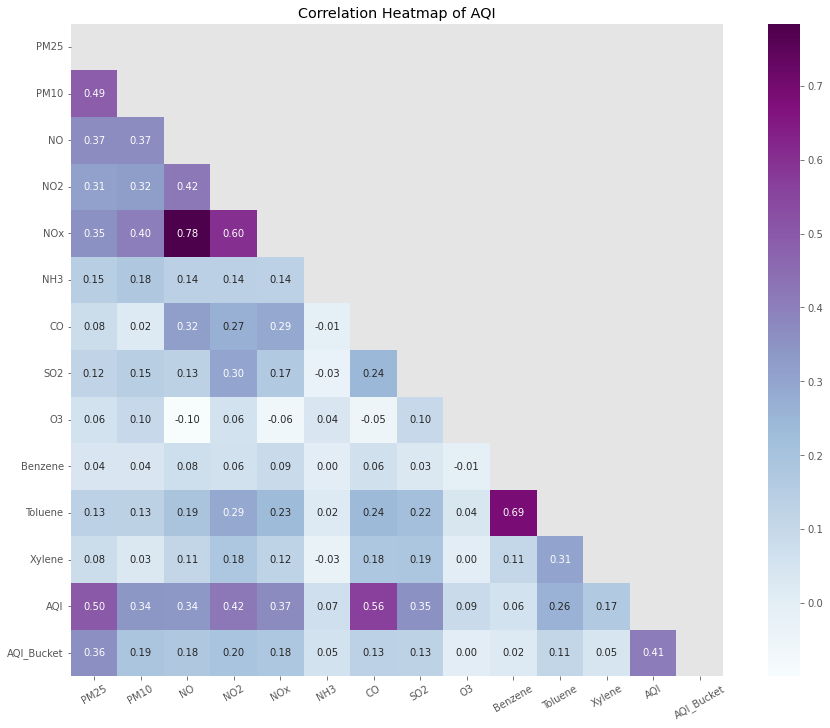

In [20]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of AQI')
ax = sns.heatmap(df.corr(), annot=True, square=True,  fmt='.2f',mask=mask,cmap='BuPu' )
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)           
sns.axes_style("white")
plt.show()

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
temp = df
y, X = dmatrices('AQI_Bucket ~ PM25 + PM10 + NO + NO2 + NOx + NH3 + CO + SO2 + O3 + Benzene + Toluene + Xylene + AQI', data=temp, return_type='dataframe')

#calculate VIF for each explanatory variable
vif_tomorrow = pd.DataFrame()
vif_tomorrow['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_tomorrow['Features'] = X.columns
vif_tomorrow

In [ ]:
sns.pairplot(df[num_cols])
plt.show()